In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import collections


In [45]:
df = pd.read_csv("../data/train_cleaned.csv")

In [46]:
df.shape

(61878, 94)

In [85]:
U, sigma, V = np.linalg.svd(df.sample(10000))


In [12]:
U.shape

(10000, 10000)

In [13]:
sigma

array([ 1107.02785116,   719.92690788,   653.37883287,   591.52234269,
         530.14623712,   470.44481513,   452.98750843,   437.79386114,
         411.20927951,   406.36657296,   388.7692531 ,   378.66849431,
         345.35385084,   343.82055226,   340.51293668,   322.84942792,
         312.94220625,   305.53145695,   289.20643056,   278.29955325,
         266.95728243,   260.36042016,   255.90455973,   238.76131244,
         235.65328145,   228.33884004,   224.42648148,   218.63265071,
         217.53879971,   208.06111285,   206.17503753,   205.75644512,
         200.86112665,   197.25372393,   194.52574596,   189.3601729 ,
         185.53778037,   179.38242339,   179.12593503,   176.2395799 ,
         171.55835083,   167.74325118,   163.50687179,   156.89757567,
         154.7939676 ,   153.5677369 ,   147.73309837,   142.73268481,
         139.29098233,   134.98242013,   133.30609332,   132.24326755,
         130.6357568 ,   127.37364636,   124.72410411,   123.25499074,
      

In [86]:
sample = df.drop("target",axis=1).sample(10000)
U, sigma, V = np.linalg.svd(sample)


In [87]:
sample.index

Int64Index([51615, 61251, 57024, 44661, 33783, 60060, 49705,  3149, 29404,
            16760,
            ...
            55666,  1538, 61490, 37551, 51754,   506, 13289, 46466, 42206,
            43156],
           dtype='int64', length=10000)

In [88]:
sigma

array([ 1006.42500277,   699.11321472,   643.08673557,   531.56829253,
         459.52788657,   440.08597706,   430.58534103,   388.63420126,
         377.99429912,   372.36420611,   360.78520361,   352.49387163,
         344.26653375,   332.83225745,   325.33448839,   323.04578433,
         317.47841684,   307.10620544,   301.89655043,   284.88552135,
         273.12292412,   258.83139451,   249.227848  ,   245.33690395,
         237.12016061,   227.66000464,   218.26713151,   217.92495707,
         210.79846418,   208.27722967,   201.33016447,   200.91428263,
         195.99118862,   193.71578269,   190.15790116,   186.04163435,
         181.3554728 ,   180.59739074,   180.14377264,   172.94551498,
         170.08325821,   167.87492419,   162.25780311,   160.08937435,
         159.22493996,   151.06143908,   150.32179873,   146.32135374,
         141.69683583,   138.99049865,   136.4918297 ,   133.72050234,
         129.9888874 ,   128.90527009,   124.36686655,   121.90078421,
      

In [89]:
print("V = ")
print(np.round(V, decimals=2))

V = 
[[-0.05 -0.06 -0.11 ..., -0.04 -0.03 -0.02]
 [-0.   -0.01  0.31 ..., -0.01  0.03 -0.  ]
 [ 0.04 -0.07 -0.15 ...,  0.01  0.01  0.01]
 ..., 
 [ 0.    0.03 -0.01 ..., -0.    0.01  0.02]
 [-0.01 -0.    0.   ...,  0.    0.01  0.01]
 [ 0.   -0.   -0.   ..., -0.    0.   -0.  ]]


In [107]:
U[:, 0]

array([-0.02807785, -0.01541829, -0.00401026, ..., -0.0028648 ,
       -0.00975732, -0.01297351])

In [109]:
lis = U[:, 0].round(2)
collections.Counter(lis)

Counter({-0.089999999999999997: 1,
         -0.070000000000000007: 3,
         -0.059999999999999998: 15,
         -0.050000000000000003: 24,
         -0.040000000000000001: 67,
         -0.029999999999999999: 168,
         -0.02: 547,
         -0.01: 4834,
         -0.0: 4341})

In [102]:
np.sort(U[:, 0].round(4))

array([-0.0859, -0.0687, -0.0681, ..., -0.0001, -0.0001, -0.0001])

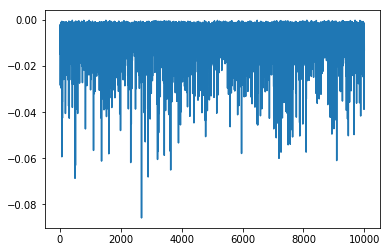

In [96]:
plt.plot(U[:, 0].round(6))
plt.show()

In [28]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])


In [29]:
print( "A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=sample.index, columns=sample.columns))
print("\nError from actual value:\n")
print(sample - A_approx)

A calculated using only the first two components:

         feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
43436  0.288818  0.314727  1.179296  1.003878  0.061879  0.020815  0.197348   
30487  0.035589  0.035768  0.172447  0.144602  0.007982  0.002474  0.023005   
31505  0.250829  0.348942  0.343384  0.347355  0.044772  0.020364  0.204338   
37262  0.649089  0.879799  1.097350  1.059695  0.118610  0.051997  0.518678   
53303  0.946168  0.782118  6.104679  5.015391  0.232242  0.060662  0.538047   
2742   0.181900  0.172962  0.970125  0.807434  0.041968  0.012346  0.113287   
49394  0.322148  0.443464  0.483284  0.478680  0.058059  0.026012  0.260392   
47677  1.088656  1.203100  4.294063  3.667549  0.231254  0.078968  0.751189   
19130  0.076323  0.049237  0.617166  0.500659  0.020377  0.004474  0.037365   
7425   0.096901  0.091020  0.526883  0.437900  0.022490  0.006543  0.059862   
6852   0.170432  0.204486  0.526946  0.462226  0.034289  0.012851  0.124632   
2

In [66]:
svd = pd.DataFrame(A_approx, index=sample.index, columns=sample.columns)
svd.head()

target_df = pd.DataFrame(df.iloc[sample.index,93],index=sample.index)
svd = pd.concat([svd,target_df],axis=1)

In [67]:
svd

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
43436,0.288818,0.314727,1.179296,1.003878,0.061879,0.020815,0.197348,0.465876,0.542508,0.215682,...,0.321057,0.629148,0.336276,0.450377,0.436069,0.796041,0.202487,0.265253,0.114650,6
30487,0.035589,0.035768,0.172447,0.144602,0.007982,0.002474,0.023005,0.055234,0.065730,0.027387,...,0.042461,0.080473,0.042327,0.059100,0.059888,0.061465,0.024183,0.036229,0.013840,5
31505,0.250829,0.348942,0.343384,0.347355,0.044772,0.020364,0.204338,0.459119,0.499252,0.166998,...,0.206069,0.472436,0.269705,0.300738,0.224271,1.610370,0.195131,0.141447,0.106792,6
37262,0.649089,0.879799,1.097350,1.059695,0.118610,0.051997,0.518678,1.171379,1.283336,0.438383,...,0.555571,1.245235,0.704785,0.805961,0.627719,3.885479,0.499044,0.393296,0.274140,6
53303,0.946168,0.782118,6.104679,5.015391,0.232242,0.060662,0.538047,1.346724,1.684747,0.773455,...,1.291315,2.304580,1.175189,1.773053,1.937008,-0.417779,0.599882,1.161704,0.351820,8
2742,0.181900,0.172962,0.970125,0.807434,0.041968,0.012346,0.113287,0.275202,0.332290,0.142624,...,0.226506,0.420946,0.219251,0.313846,0.326225,0.194383,0.121089,0.196758,0.069796,2
49394,0.322148,0.443464,0.483284,0.478680,0.058059,0.026012,0.260392,0.586276,0.639461,0.215742,...,0.269179,0.611356,0.347777,0.391859,0.297627,2.011196,0.249416,0.187185,0.136708,8
47677,1.088656,1.203100,4.294063,3.667549,0.231254,0.078968,0.751189,1.768154,2.051142,0.808472,...,1.194025,2.355064,1.262583,1.677565,1.609415,3.204564,0.767522,0.980097,0.433761,7
19130,0.076323,0.049237,0.617166,0.500659,0.020377,0.004474,0.037365,0.098645,0.130752,0.066113,...,0.117494,0.199450,0.098890,0.159586,0.184544,-0.202079,0.044858,0.110000,0.027056,3
7425,0.096901,0.091020,0.526883,0.437900,0.022490,0.006543,0.059862,0.145798,0.176600,0.076279,...,0.121741,0.225340,0.117130,0.168530,0.176072,0.089943,0.064221,0.106133,0.037074,2


In [68]:
df_train,df_test = train_test_split(svd,random_state=42, test_size=0.3)

In [72]:
X_train = df_train.drop("target",axis=1)
X_test =  df_test.drop("target",axis=1)

In [73]:
y_train = df_train.target
y_test = df_test.target

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
log_loss(y_test,lr.predict_proba(X_test))

1.7154217889737322